<img src="youtube.png" width="100" align="center">

<h1 align="center">Text Data Analysis (Youtube case Study)</h1>


- Sentimental Analysis.
- Dislike vs Views Analysis.
- Trending Video tags on youtube.

In [12]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
#!pip install --upgrade pip
# !pip install textblob
# !pip install pandas numpy matplotlib seaborn 
# !pip install emoji
# !pip install plotly
# !pip install chart_studio

In [21]:
df = pd.read_csv('UScomments.csv', on_bad_lines="skip",encoding='latin-1', low_memory=False)

In [22]:
df

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â¼ï¸â¼ï¸â¼ï¸,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending ð,3,0
...,...,...,...,...
691395,EoejGgUNmVU,ÐÑÑÑÐ°Ñ,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes Ã Roa...,0,0
691397,EoejGgUNmVU,Ven a mexico! ð te amo LP,0,0
691398,EoejGgUNmVU,IslÄ±ÄÄ± yeter...,0,0


## Data Preprocessing
 cleaning data, finding missing values and outliers

In [23]:
df.isnull().sum()
df.dropna(inplace=True)

## Sentimental Analysis
 we're to find out the polarity , subjectivity of comments from youtube case study

In [24]:
from textblob import TextBlob
polarity = []

for comment in df['comment_text']:
    polarity.append(TextBlob(comment).sentiment.polarity)

df['polarity'] = polarity
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â¼ï¸â¼ï¸â¼ï¸,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending ð,3,0,0.0


## WordCloud Representation of sentiment analysis
identifying the positive, negetive comments from the youtube case study and plotting a worcloud to better visualize the distict comments

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(-0.5, 399.5, 199.5, -0.5)

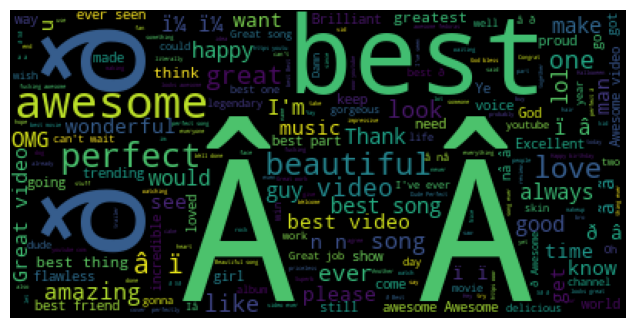

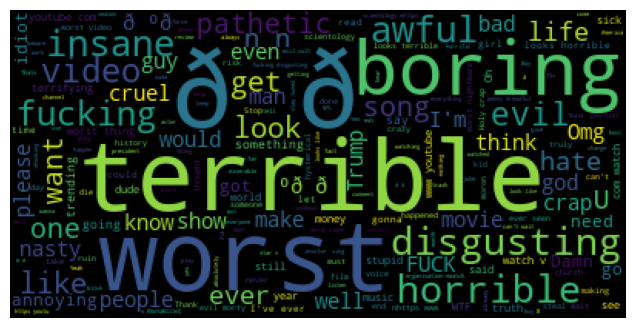

In [25]:
#!pip install wordcloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

# collecting the positive and negative comments
positive_comments = df[df['polarity'] == 1]
negative_comments = df[df['polarity'] == -1]

# wordcloud recieves a string as value (convert series in dataframe to string)
total_comments1 = ' '.join(positive_comments['comment_text'])
total_comments2 = ' '.join(negative_comments['comment_text'])

# wordcloud representing of positive comments
stopword = stopwords.words('english')
word_cloud = WordCloud(stopwords=stopword).generate(total_comments1)
plt.figure(figsize=(12,4))
plt.imshow(word_cloud)
plt.axis('off')

# wordcloud representing of negative comments
word_cloud = WordCloud(stopwords=stopword).generate(total_comments2)
plt.figure(figsize=(12,4))
plt.imshow(word_cloud)
plt.axis('off')




## Emoji Analysis
 performing analysis on emoji's on youtube case study to determine dislikes and views from users

In [26]:

import emoji
from plotly.offline import iplot
import chart_studio.plotly as py
import plotly.graph_objects as go
from collections import Counter

emoji_list = []
for comment in df['comment_text']:
    for c in comment:
        if c in emoji.EMOJI_DATA:
            emoji_list.append(c)
            
# most common emojis in comment
freq = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

#plot frequency of emojis
trace = go.Figure(
        data=[go.Bar(x=emoji_list, y =freq)],
        layout_title_text="A Figure Displayed with fig.show()"
)
trace.show()

IndexError: list index out of range

## Collect entire data from youtube

In [ ]:
import os
path = r"C:\Users\USER\Downloads\PERSONAL DEV\Data Analytics\Datasets\additional_data"
files = os.listdir(path)

# extract the csv files from the list of data
full_df = pd.DataFrame()
file_csv = [files[i] for i in range(0, len(files), 2)]   # within the range of 0 and the length of csv file using step 2

for file in file_csv:
    current_df = pd.read_csv(path+ "\\" +file, encoding="ISO-8859-1", error_bad_lines=False)
    current_df['country'] = file.split('.')[0][0:2]
    full_df = pd.concat([full_df, current_df])
    
full_df

## Analysing the most Liked category
 peforming analysis on the most liked category of youtube videos

In [ ]:
# read out ctaerogi
category_df = pd.read_csv(r'C:\Users\USER\Downloads\PERSONAL DEV\Data Analytics\Datasets\category_file.txt', sep=':')
category_df.reset_index(inplace=True)
category_df.columns = ['category_id', 'category_name']
category_df.set_index('category_id', inplace=True)
category_df